Name:Sheing Jing Ng (Stanley)
ID: 100206278
Date Started: 10/25/2016

Part 1: REGRESSION EXPERIMENT

(5 points) Pick some data suitable for classification learning that we haven't already used for this class. In your write-up briefly summarize the data set including the predictive columns and the target column(s). Briefly describe any data preparation you performed (and say why you did it).

Dataset Name: Airfoil Self-Noise 
Citation: This datasets was made by Dr Roberto Lopez.
Source Link:https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

###NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil sections conducted in an anechoic wind tunnel. The data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments###

First off, I have to admit I picked this datasets because it has something to do with NASA. Secondly, it is an easy data to analyze since it only has 6 attributes. The purpose of analysing this data is to predict the value of scaled sound pressure level given 5 different attributes mentioned below. 


Target Column:
1.Frequency, in Hertzs.
2.Angle of attack, in degrees.
3.Chord length, in meters.
4.Free-stream velocity, in meters per second.
5.Suction side displacement thickness, in meters.

Predict Column:
6.Scaled sound pressure level, in decibels.

This data doesn't contain missing values. The only thing I did prior experiment is to convert .DAT to csv file.


In [26]:
import sklearn
import pandas
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn import cross_validation as cv
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

air_data = pandas.read_csv("Airfoil.csv")
(air_train, air_test) = cv.train_test_split(air_data, test_size = 0.2)
air_predictor=['Frequency', 'Angle of attack', 'Chord length','Free-stream velocity',\
               'Suction side displacement thickness']



Question 1B:(6 points) Using the scikit-learn SGDRegressor algorithm, perform an experiment to determine how well the classifier works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., learning rate, number of epochs). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs with different training/testing splits to ensure that the results aren't simply due to luck.

10/28/2016:

I tried to run below's code, but it took to long to load due to the size of the file. 
Thus, I decided to run it individually in another file and concluded that 100000 has the lowest M.S.E.

Uncomment below to run the code, warning: it will takes a really long time.

Extra:
10/30/2016:
I found another way to attempt this problem that had lower M.S.E.
LinearRegression

Steps shown below.


In [ ]:
"""
air_predictor=['Frequency', 'Angle of attack', 'Chord length',\
               'Free-stream velocity', 'Suction side displacement thickness']

(air_train, air_test) = cv.train_test_split(air_data, test_size = 0.2)

x_value=[10,50,100,500,1000,5000,10000,50000,1000000]
y_value=[]
for i in x_value:
    sgdr_air=SGDRegressor(n_iter=i)
    total=0
    count=0
    for i in range(0,20):
        sgdr_air.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
        sgdr_air_predictions= sgdr_air.predict(air_test[air_predictor])
        #print(sgdr_air_predictions)
        #print(air_test["Scaled sound pressure level"])
        total += metrics.mean_squared_error(sgdr_air_predictions,air_test["Scaled sound pressure level"])
        count=count+1
    average_accuracy=total/count
    y_value.append(average_accuracy)
print(y_value)

%matplotlib inline
plt.suptitle('Epochs MSE Performance')
plt.xlabel('Number of Epochs')
plt.ylabel('M.S.E')
plt.plot(x_value,y_value,'bo-',label='# of epochs')
plt.legend(loc='best',shadow=True)
plt.axis([0,1000000,1e+30,1e+33])
plt.show()
 """

[4.0835728548103059e+34, 2.1850521672203775e+32, 4.8495354873770321e+30, 3.260305367857638e+28, 1.3092367759722722e+26, 3.6304780065654245e+23, 17240.615763109632, 8906.3530873524305, 8910.5533209805817]


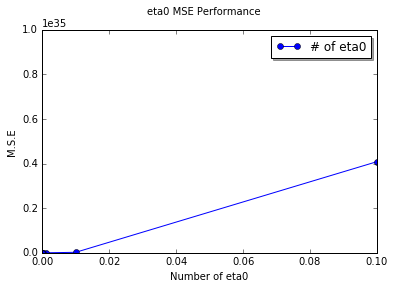

In [17]:
air_predictor=['Frequency', 'Angle of attack', 'Chord length',\
               'Free-stream velocity', 'Suction side displacement thickness']

(air_train, air_test) = cv.train_test_split(air_data, test_size = 0.2)

x_values=[0.1,0.01,0.001,0.0001,0.00001,0.000001,.0000001,.00000001,.000000001]
y_values=[]
for i in x_values:
    sgdr_air=SGDRegressor(eta0=i)
    total=0
    count=0
    for j in range(0,20):
        sgdr_air.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
        sgdr_air_predictions= sgdr_air.predict(air_test[air_predictor])
        #print(sgdr_air_predictions)
        #print(air_test["Scaled sound pressure level"])
        total += metrics.mean_squared_error(sgdr_air_predictions,air_test["Scaled sound pressure level"])
        count=count+1
    average_accuracy=total/count
    y_values.append(average_accuracy)
print(y_values)

%matplotlib inline
plt.suptitle('eta0 MSE Performance')
plt.xlabel('Number of eta0')
plt.ylabel('M.S.E')
plt.plot(x_values,y_values,'bo-',label='# of eta0')
plt.legend(loc='best',shadow=True)
plt.axis([0.000000001,.1,5000,1e+35])
plt.show()
    

In [34]:
(air_train, air_test) = cv.train_test_split(air_data, test_size = 0.2)

air_predictor=['Frequency', 'Angle of attack', 'Chord length','Free-stream velocity', 'Suction side displacement thickness']
sgdr_air=SGDRegressor(eta0=0.00000001,n_iter=100000)
for i in range(0,10):
    sgdr_air.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
    sgdr_air_predictions= sgdr_air.predict(air_test[air_predictor])
    print(metrics.mean_squared_error(sgdr_air_predictions,air_test["Scaled sound pressure level"]))


1349.34199282
1349.47075451
1349.82329139
1349.64947233
1349.50619466
1349.31439643
1353.03301431
1349.44645946
1350.9837896
1349.83129679


Here, I used the best eta0 and n_iter to loop through 10 times. I got a result varying from 1349-1353. Conclusion: The MSE is still pretty huge.

Next, I am going to use Linear Regression method to attempt this problem.

In [44]:
LR= LinearRegression()

for i in range(0,20):
    LR.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
    LR_predictions= LR.predict(air_test[air_predictor])
    print(LR_predictions)
    #print(sgdr_mpg_predictons)

    print(metrics.mean_squared_error(LR_predictions,air_test["Scaled sound pressure level"]))


[ 129.64670435  123.4578545   131.38066024  125.15096466  116.84623163
  128.09724635  118.59710132  122.90000307  129.46055226  127.33236858
  118.83954054  121.54303709  125.06757406  133.5863182   130.32186049
  122.76245337  124.3142671   130.46967624  124.33405664  127.45445336
  123.50478211  123.69986214  118.30265163  118.48906284  124.35341469
  121.72396326  120.2081775   122.48980354  116.78251723  126.29209348
  112.77863778  127.62646594  128.06069901  131.9313814   120.30940048
  126.13161494  130.96006072  132.43797041  125.86216135  127.22291203
  125.75567306  109.17128723  117.71383572  126.31372706  124.49550364
  119.1332957   119.56488465  121.06677701  128.66798642  121.56447969
  131.24133506  126.61882518  124.82177478  122.52631929  128.43611402
  126.46666962  125.2000997   130.35079936  127.84240814  130.3433499
  129.63435305  120.54752755  129.99740808  125.05849924  121.88147505
  118.50980396  121.823928    124.75236568  111.14986414  119.19882125
  119.2

Using Linear Regression, I was able to narrow down the M.S.E close to 20-25 range.

6 points) Using a scikit-learn implementation of another regressor algorithm (e.g., k-Nearest-Neighbor, Random Forest, or Multilayer Perceptron), perform an experiment to determine how well the regressor works on your data set. In your write-up, discuss the results. You will need to convince me that you have selected appropriate parameters for learning (e.g., the number of neighbors, number of trees, etc.). You will probably need to include a plot (or plots) of some sort to demonstrate this. Any data points you include should be averages over several runs with different training/testing splits to ensure that the results aren't simply due to luck.

1
5
10
100
250
500
[9.6867503264119588, 4.5500884991029888, 4.0156210695033216, 3.304213715227406, 3.3041985322227099, 3.2721604435163933]


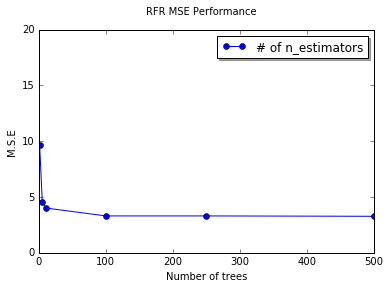

In [73]:
from sklearn.ensemble import RandomForestRegressor as RFR

air_predictor=['Frequency', 'Angle of attack', 'Chord length',\
               'Free-stream velocity', 'Suction side displacement thickness']
x_array=[1,5,10,100,250,500]
y_array=[]
for i in x_array:
    rfr = RFR(n_estimators=i)
    count=0
    total=0
    print(i)
    for j in range(0,20):
        rfr.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
        rfr_predictions= rfr.predict(air_test[air_predictor])
        count=count+1
        total+=metrics.mean_squared_error(rfr_predictions,air_test["Scaled sound pressure level"])
    average_accuracy=total/count
    y_array.append(average_accuracy)
print(y_array)

%matplotlib inline
plt.suptitle('RFR MSE Performance')
plt.xlabel('Number of trees')
plt.ylabel('M.S.E')
plt.plot(x_array,y_array,'bo-',label='# of n_estimators')
plt.legend(loc='best',shadow=True)
plt.axis([0,500,0,20])
plt.show()

    


RFR is by far the best algorithm to have the lowest M.S.E compare to LinearRegression and SGDRegressor. I am happy with a low MSE of 3.326 when n_estimators is 500.

I tried to make n_Estimators go beyond 500 but it takes a long time to run. Considering time running efficiency, 500 is a good tree number.

[61.021303863787367, 37.744545652358816, 34.867948126744182, 33.786791852949825, 34.953181642145374, 37.308908454471968]


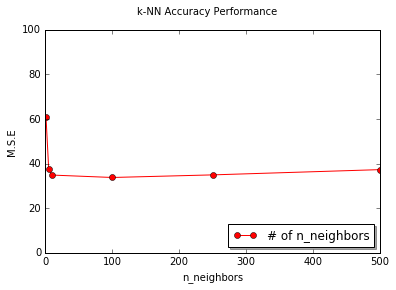

In [70]:
from sklearn.neighbors import KNeighborsRegressor

kNN_array = []
X_array=[1,5,10,100,250,500]

for i in X_array:
    knn= KNeighborsRegressor(n_neighbors=i)
    total=0
    count=0
    for j in range(0,20):
        knn.fit(air_train[air_predictor],air_train["Scaled sound pressure level"])
        knn_predictions= knn.predict(air_test[air_predictor])
        count=count+1
        total+=metrics.mean_squared_error(knn_predictions,air_test["Scaled sound pressure level"])
    average_accuracy=total/count
    kNN_array.append(average_accuracy)
print(kNN_array)

%matplotlib inline

plt.suptitle('k-NN Accuracy Performance')
plt.xlabel('n_neighbors')
plt.ylabel('M.S.E')
plt.plot(X_array,kNN_array,'ro-',label='# of n_neighbors')
plt.legend(loc='lower right',shadow=True)
plt.axis([0,500,0,100])
plt.show()

Question 2D: (3 points) Discuss conclusions in your write-up. Which algorithm performed better? Give reasons why you think that's the case.

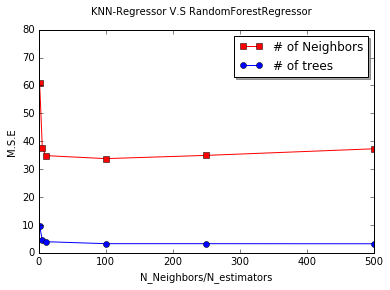

In [76]:
%matplotlib inline
plt.suptitle('KNN-Regressor V.S RandomForestRegressor')
plt.xlabel('N_Neighbors/N_estimators')
plt.ylabel('M.S.E')
plt.plot(X_array,kNN_array,'rs-',label='# of Neighbors')
plt.plot(x_array,y_array,'bo-',label='# of trees')
plt.legend(loc='best',shadow=True)
plt.axis([0,500,0,80])
plt.show()

From above, we can clearly conclude that RFR is a better regressor algorithm. Random Forest has clearly outperformed the rest of the prediction algorithms,both in Mean Squared Error and Running Time efficiency.

Reason:
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Since the Airfoil Self-Noise data contains >1000 rows of data, RFR is able to reduce over-fitting problems and came up with a low MSE result.

Linear regression is placed No.2 with MSE around 20-25. Followed by KNN-Regressor and last SGDRegressor